In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
test = session.query(Measurement).first()
test.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fb3ac99af0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date = str(most_recent_date)
most_recent_date

"('2017-08-23',)"

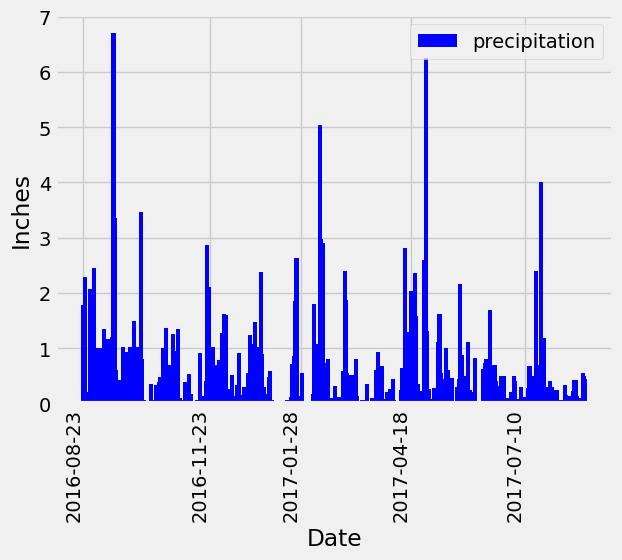

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_as_dt = datetime.strptime(most_recent_date, "('%Y-%m-%d',)").date()

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_as_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(data)
data_df = data_df.rename(columns={"date": "Date", "prcp": "Precipitation (in)"})


# Sort the dataframe by date
sorted_data_df = data_df.sort_values(by=["Date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = sorted_data_df["Date"]
y_axis = sorted_data_df["Precipitation (in)"]
plt.bar(x_axis, y_axis, color='blue', width=3)
show_xticks = ['2016-08-23', '2016-11-23', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(show_xticks, rotation='vertical', ha='right')

plt.ylabel("Inches")
plt.xlabel("Date")

plt.legend(['precipitation'])

plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_data_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
test2 = session.query(Measurement).first()
test2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fb3ac99af0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
for station_name, count in query:
    print(station_name, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'

sel = [
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
]

station_temps = session.query(*sel).filter((Measurement.station) == most_active_station).all()
station_temps



[(54.0, 85.0, 71.66378066378067)]

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([ 77. , 104.5, 132. , 159.5, 187. , 214.5, 242. , 269.5, 297. ,
        324.5, 352. ]),
 <a list of 2 BarContainer objects>)

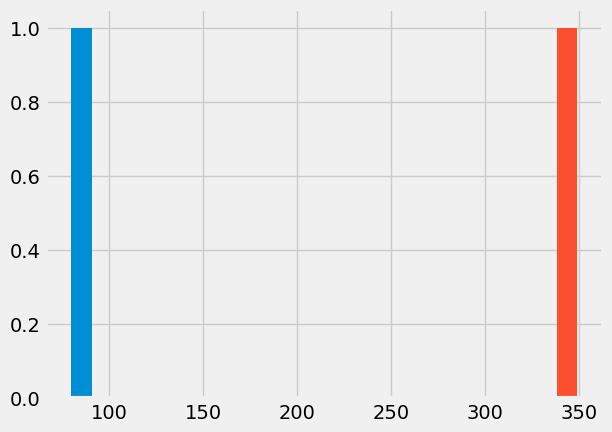

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = 'USC00519281'

temp_data = (
    session.query(Measurement.tobs, func.count(Measurement.tobs).label('count'))
    .filter(Measurement.date >= one_year_ago)
    .filter(Measurement.station == most_active_station)
    #.group_by(Measurement.tobs)
    #.order_by(func.count().desc())
    .all()
)

temp_data_df = pd.DataFrame(temp_data)

plt.hist(temp_data_df)


Text(0.5, 4.183333333333314, 'Temperature')

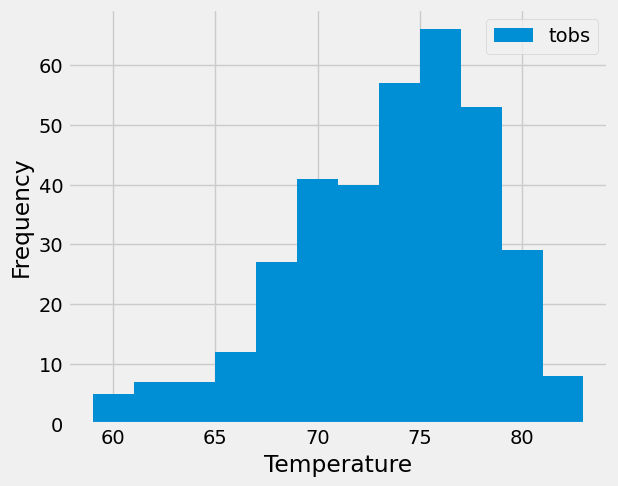

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()